# Simple Text Analysis 

* Scrape a website with loads of text
* Create a word to count frequency matrix
* Show the word cloud
* Do the same for phrases: n-grams

In [6]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

/usr/local/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [3]:
# Do a GET request to a web page
response = requests.get('http://www.paulgraham.com/hamming.html')

In [4]:
# Create a html parser
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
# Grab the text within the first table element from the web page
text = soup.table.get_text()

In [7]:
# Convert a collection of text documents to a matrix of token counts
vect = CountVectorizer(stop_words='english')
mat = vect.fit_transform([text])
vect2 = CountVectorizer(stop_words='english', ngram_range=(2, 3))
mat2 = vect2.fit_transform([text])

In [8]:
# Get the counts to the first document
counts = mat.toarray()[0]
counts2 = mat2.toarray()[0]

In [12]:
# Find the index with the token 'work'
arr = np.asarray(vect.get_feature_names())
ind = np.where(arr == 'work')
counts[ind]

array([78], dtype=int64)

In [15]:
# Create feature array of (word, count)
features = list(zip(vect.get_feature_names(), counts))
features2 = list(zip(vect2.get_feature_names(), counts2))

In [16]:
import wordcloud
features

[('10', 6),
 ('12', 2),
 ('14', 2),
 ('17', 1),
 ('1986the', 1),
 ('20', 3),
 ('30', 1),
 ('340', 1),
 ('50', 2),
 ('590', 1),
 ('99', 1),
 ('ability', 6),
 ('able', 4),
 ('absolute', 2),
 ('absolutely', 1),
 ('absorb', 2),
 ('absorbers', 4),
 ('abstraction', 1),
 ('academy', 1),
 ('accomplished', 1),
 ('according', 1),
 ('account', 1),
 ('accumulated', 1),
 ('acorns', 3),
 ('acre', 1),
 ('action', 2),
 ('active', 1),
 ('activity', 1),
 ('actually', 1),
 ('adapt', 1),
 ('adding', 1),
 ('address', 2),
 ('adds', 1),
 ('adjunct', 1),
 ('admit', 1),
 ('adopt', 1),
 ('adopted', 1),
 ('advanced', 1),
 ('advantage', 1),
 ('advice', 1),
 ('affect', 1),
 ('affecting', 1),
 ('afraid', 1),
 ('afternoon', 3),
 ('afternoons', 1),
 ('age', 6),
 ('agree', 2),
 ('ahead', 2),
 ('ain', 1),
 ('airplane', 2),
 ('airport', 1),
 ('alamos', 6),
 ('alan', 2),
 ('alibi', 1),
 ('alibis', 4),
 ('allocating', 1),
 ('altering', 1),
 ('alternate', 1),
 ('ambiguity', 2),
 ('ampere', 1),
 ('amusement', 2),
 ('analog'

/usr/local/lib/python3.5/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


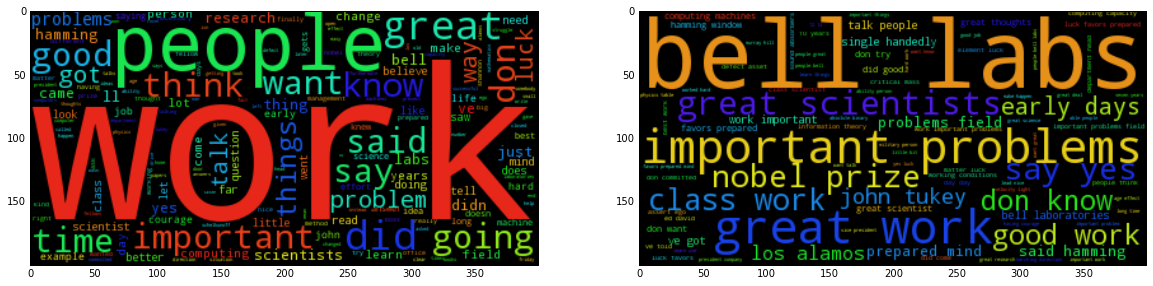

In [17]:
# Plot the word cloud
w = wordcloud.WordCloud()
img = w.generate_from_frequencies(features)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)

img2 = w.generate_from_frequencies(features2)
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.show()